# Business Understanding
Movies and films offer the best form of entertainment amongst many people. Tapping into the movie industry however needs a thorough analysis because its market is very dynamic and fluctuates day in day out. Captivating your audience requires more than just an idea or imagination but also the right people suited to do make your ideas a reality. 

We have been tasked with lookig into the data of the film industry seeking to find the dynamics in this lucrative market. After data examination, we should be able to give **Microsoft** better recommendations as they dive into the film industry. 
The tasks include:
1. To find the most popular movie genres with a rating above 5 to venture into.
2. To find the production costs of different studios together with their operating profits as well as the studios availability.
3. To find the best script writers and movie directors with experience who make the best quality movies. 
4. To find the most common movie age rating which determines movie content.
5. To find the best optimum time duration for making high quality captivating films.




# Import libraries.
We use third party libraries intergrated with python which are very necessary to aid in reading and manipulating data to extract meaningful insights. They include the following:
* **Pandas** to read and manipulate the dataframes.
* **Numpy** for numerical analysis
* **Matplotlib** for visualization of plots and graphs.
* **Seaborn** for plots.
* **Sqlite3** for querying over our database.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Import necesary libraries needed to read the data, for visualization and connecing to the database.
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import sqlite3

# Connection to the IMDB database
conn = sqlite3.connect('im.db')

#  Database QUERY
We query our movie database using the tables **movie_basics** and **movie_ratings** as our most relevant tables for this analysis. We seek to find the genres with the best ratings and also the duration time of the best films.

* View columns in movie_basics table
* View columns in movie_ratings table.
* Join the two tables using the common column among them and filter by average rating greater than 5.
* Display the first 20 popular movie genres.

Provided below is the movie Entity Relationship diagram.

![](movie_data_erd.jpeg)

In [2]:
# Query im.db database using only the tables movie_basics and movie_ratings.
# Use the where condition to ensurethe runtime minutes column is doesnt have any null values.
q = """
    SELECT *
    FROM movie_basics
    WHERE runtime_minutes IS NOT NULL;
"""
pd.read_sql(q,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
114400,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
114401,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
114402,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
114403,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama


In [3]:
# Query movie_ratings_table.
q = """
    SELECT *
    FROM movie_ratings;
"""
pd.read_sql(q,conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
# Join the two tables using the movie_id
# Filter the query to obtain the movies with best overall rating.
q = """
    SELECT primary_title,genres,runtime_minutes,averagerating,numvotes
    FROM movie_basics
    JOIN movie_ratings
    USING(movie_id)
    WHERE averagerating > 5
    ORDER BY averagerating DESC
    LIMIT 20;
"""
query_1 = pd.read_sql(q,conn)
query_1

,primary_title,genres,runtime_minutes,averagerating,numvotes
0,The Paternal Bond: Barbary Macaques,Documentary,59.0,10.0,5
1,Requiem voor een Boom,Documentary,48.0,10.0,5
2,Freeing Bernie Baran,"Crime,Documentary",100.0,10.0,5
3,Hercule contre Hermès,Documentary,72.0,10.0,5
4,Pick It Up! - Ska in the '90s,Documentary,99.0,10.0,5
5,Revolution Food,Documentary,70.0,10.0,8
6,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,93.0,10.0,5
7,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,52.0,10.0,5
8,Dog Days in the Heartland,Drama,NaN,10.0,5
9,Fly High: Story of the Disc Dog,Documentary,65.0,10.0,7


In [5]:
# Get the first 20 movie genre counts with average ratings above 5.
# Look for the best movie genres with good average rating.
q = """
    SELECT genres, COUNT(*) AS genre_count
    FROM movie_basics
    JOIN movie_ratings
    USING(movie_id)
    WHERE averagerating > 5 
    GROUP BY genres
    ORDER BY genre_count DESC
    LIMIT 20
    ;
"""
query_2 = pd.read_sql(q,conn)
query_2

,genres,genre_count
0,Drama,10395
1,Documentary,9936
2,Comedy,3972
3,"Comedy,Drama",2277
4,"Drama,Romance",1311
5,Horror,1188
6,"Comedy,Drama,Romance",1065
7,Thriller,1027
8,"Comedy,Romance",959
9,"Drama,Thriller",799


# DATA UNDERSTANDING, CLEANING AND PREPARATION
With data understanding, we seek to know contents of the provided datasets.

The data provided may be messy. Data cleaning process seeks to address the missing values, duplicate items, merging and concatenating dataframes so as to have a clear data distribution before analysis. This will help us make informed reccommendations to the **Microsoft team**.
We check for missing values and shape of the dataframes.
We also check how data in our dataframes is distributed using the **pandas describe function.**

We read through every data provided in the zippedData folder from **df1** to **df5**

**Dataframe 1**
- Read the data file
- Check the column names
- Narrow down to column studio values and their counts.
- Use a function to convert the column foreign gross to a float data type.
- Drop all missing values.
- Check for duplicates.
-Use the describe function to view the statistics of our numerical columns.

In [6]:
# Read the zipped data in the project directory.
# The data seems to be messy and as such you can not tokenize it. 
# Inspect the data one by one
# Looping through the dataframe may also be inappropriate for large dataframes.
   
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df1.head()
   

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
#df1.info()
def find_info(dataframe):
    dataframe.info()

find_info(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
# Convert foreign_gross column to float
def column_convert(values):
     try:
          cals  = float(values.replace(",",""))
          return (cals)
     except (ValueError, AttributeError):
          return values 
     

df1['foreign_gross'] = df1['foreign_gross'].apply(column_convert)

In [9]:
df1.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [10]:
# The column has almost 40% of missing data. 
# Dropping the column foreign_gross is therefore unnecessary. We drop all the null rows instead.
# Define a function to drop null values.
def drop_null(data):
    data.dropna(inplace=True)

drop_null(df1)

In [12]:
# Use the describe function after converting the foreign gross to an integer data type. 
df1.describe()

,domestic_gross,foreign_gross,year
count,2.007000e+03,2.007000e+03,2007.000000
mean,4.701984e+07,7.579038e+07,2013.506228
std,8.162689e+07,1.381796e+08,2.597997
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.700000e+05,3.900000e+06,2011.000000
50%,1.670000e+07,1.940000e+07,2013.000000
75%,5.605000e+07,7.595000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


**Dataframe 2**
- Read the tsv zipped file(Specify the delimiter)
- Check the column data types.
- Convert date columns from object data types to datetime objects.
- Check percentage of missing values in the currency column.
- Drop all null values in our dataframe.

In [13]:
# Read the TSV zipped file and specify the delimiter
#Reading it with default read_csv format returns a parsing error.
df2 = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter='\t')
df2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
find_info(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [15]:
# Convert the date columns namely theater_date and dvd_date from object to datetime
# Check the data types containing dates has changed
df2[['theater_date','dvd_date']] = df2[['theater_date','dvd_date']].apply(pd.to_datetime)
df2.dtypes

id                       int64
synopsis                object
rating                  object
genre                   object
director                object
writer                  object
theater_date    datetime64[ns]
dvd_date        datetime64[ns]
currency                object
box_office              object
runtime                 object
studio                  object
dtype: object

In [16]:
# Use defined function for null values.
drop_null(df2)

**Dataframe 3**
- Read the tsv dataset(Specify the delimiter and encoding)
- Check the columns using the info function.
- Check columns of publisher column.
- Check contents of rating column.
- Convert date column into a datetime data type.
- Drop all missing values.

In [18]:
# Read the file by specifying the encoding type.
df3 = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t',encoding='ANSI')
df3.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [19]:
find_info(df3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [20]:
# Use defined function to drop null values.
drop_null(df3)

In [21]:
# Check contents of the publisher column.
df3['publisher'].head(10)

0               Patrick Nabarro
6               EricDSnider.com
7            Las Vegas CityLife
11              EmanuelLevy.Com
12                Big Hollywood
13          Laramie Movie Scope
14                  Movie Habit
15               The Aristocrat
16               Shotgun Cinema
17    Ozus' World Movie Reviews
Name: publisher, dtype: object

In [22]:
# Check contents of rating column
df3['rating'].value_counts()

3/4       3267
3/5       2971
4/5       2800
2/4       2442
2.5/4     2156
          ... 
9.7          1
1/2          1
1.6/5        1
2.3/10       1
3 1/2        1
Name: rating, Length: 182, dtype: int64

In [23]:
# Convert date column from object to datetime.
# Then check the datatypes to confirm the date column is ok.
df3['date'] = df3['date'].apply(pd.to_datetime)
df3.dtypes

id                     int64
review                object
rating                object
fresh                 object
critic                object
top_critic             int64
publisher             object
date          datetime64[ns]
dtype: object

**Dataframe 4**
- Read the files using a for loop as they have the same file extension which is a csv.
- Access the dataframe through indexing and check its columns.
- Convert the release date column into a date time data type.

In [24]:
# Loop through the 4th and 5th dataframes since they have the same csv format.
# Display our first dataframe
data = ['zippedData/tmdb.movies.csv.gz','zippedData/tn.movie_budgets.csv.gz']

data_list = []
for datas in data:
    df = pd.read_csv(datas)
    data_list.append(df)

data_list[0]


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [25]:
find_info(data_list[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [27]:
data_list[0]['release_date'] = data_list[0]['release_date'].apply(pd.to_datetime)

**Dataframe 5**
- Read file through indexing.
- Check the columns information.
- Convert the release date column into a date time object.
- Use a function to convert the columns with dollar signs into integers by replacing the dollar sign with an empty space.
- See the column statistics using the describe function.

In [28]:
data_list[1]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [29]:
find_info(data_list[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [30]:
# Convert the release date column from object to datetime.
data_list[1]['release_date'] = data_list[1]['release_date'].apply(pd.to_datetime)

In [31]:
# Convert production_budget, domestic_gross and worldwide columns from object datatypes to integers data type.
# We use a function called remove_dollars which removes the dollar sign, replaces the commas with an empty space 
# then returns the integer for the specified columns.
def remove_dollars(values):
    cleaned = values.replace('$','').replace(',','')
    return int(cleaned)

data_list[1][['production_budget','domestic_gross','worldwide_gross']] = data_list[1][['production_budget','domestic_gross','worldwide_gross']].applymap(remove_dollars)


In [32]:
# Check if the datatypes have been transformed from object to integers.
data_list[1].dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

In [33]:
# We use the describe function to view the statistics of our dataframe.
# Use the describe function after cleaning the production budget, domestic gross and worldwide gross column values.
data_list[1].describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


# Data Analysis
Data analysis involves exploring, analyze and visualize data to make wise recommendations in relation to the business problem at hand.

This also involves merging and concatenating the dataframes defined above to perfom statistics and visualization.
- Plot query_2 to find visualize the count of movie genres with a rating above five(Use the ax function for easier customization  of future plots).
  **This plot seeks to address the first task.**

- Create a new_merge variable to store the left merge between our 5th dataframe and first dataframe. The movie column names and title column names have the same values. The left table is retained and the right table inputs NaN when there are nomatching values.
Drop the missing values and plot a horizontal bar graph in ascending order showing the studios production budgets.
  **This plot seeks to address the second task.**

- Define a function for visualizing counts of movie runtimes in the second dataframe. The most common runtimes provide the most ideal movie durations.
  **This plot seeks to address the fifth task.**

- Use the defined function to plot the films rating distribution. 
  **This plot seeks to address our fourth question.**

- Use the defined plotting function to visualize the experience of different directors and film writers.
  **The two plots seeks to address the third task.** 

 - Use the defined function to visualize the distribution and counts of various studios.
  **This plot also addresses the second task.**

- Use the new column for profits summation to visualize the best perfoming studios in the film industry.
  **This plot also addresses the second task.**

<Figure size 2000x1500 with 0 Axes>

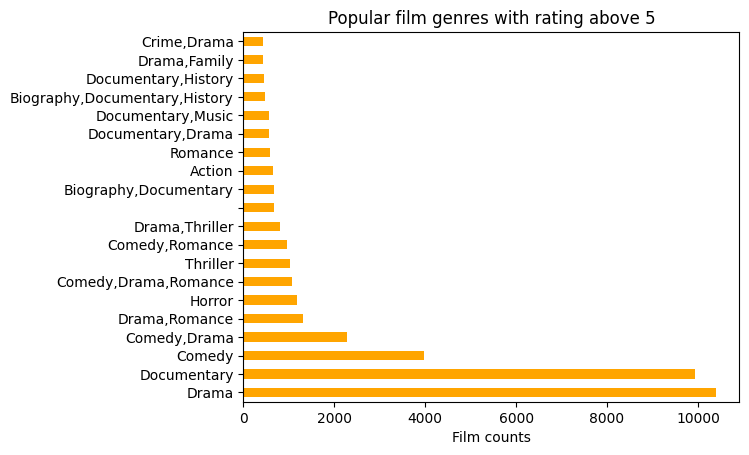

In [34]:
# Use the ax in matplotlib to have control over our plots and for
#easier plot customization to match our specific needs.

plt.figure(figsize=(20, 15))
ax = query_2.plot.barh(title="Popular film genres with rating above 5", y='genre_count', legend=False, color="orange")
plt.xlabel("Film counts")
ax.set_yticks(range(len(query_2)))  
ax.set_yticklabels(query_2['genres'])  
plt.show()


In [35]:
# Merge dataframes on columns with same values.
new_merge = data_list[1].merge(df1, left_on='movie', right_on='title', how='left')

In [36]:
new_merge

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,NaN,NaN,NaN,NaN,NaN
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011.0
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,NaN,NaN,NaN,NaN,NaN
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,NaN,NaN,NaN,NaN,NaN
5778,79,1999-04-02,Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,NaN,NaN,NaN,NaN,NaN


In [37]:
# Use defined function to drop null values.
drop_null(new_merge)

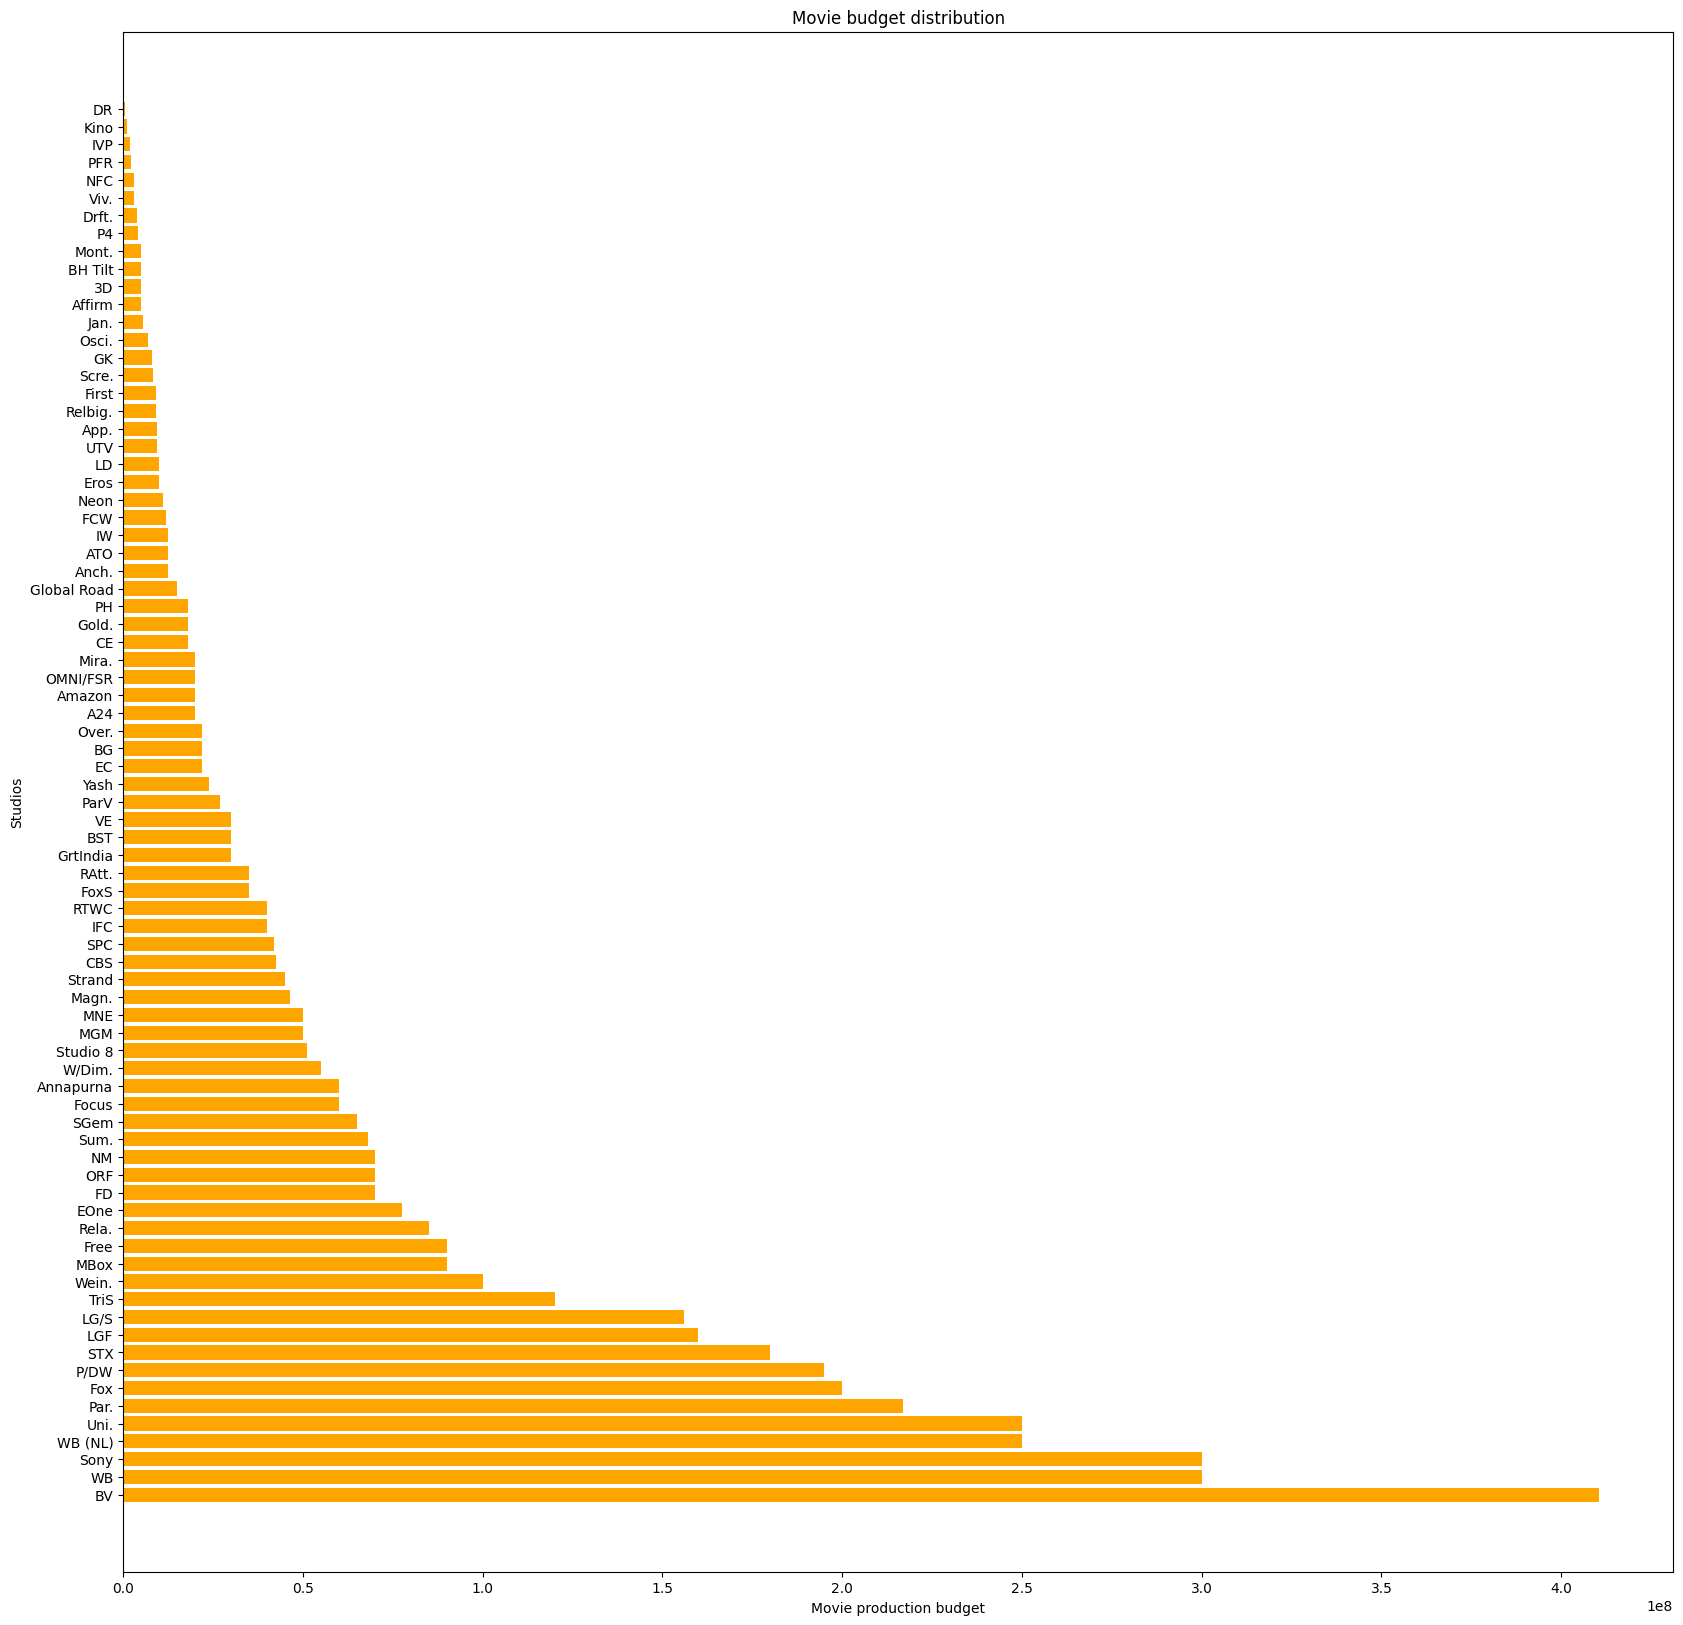

In [38]:
# Ensure the studio column is in string format.
new_merge['studio'] = new_merge['studio'].astype(str)

plt.figure(figsize=(20,20))
plt.barh(new_merge['studio'],new_merge['production_budget'],color ="orange")

plt.xlabel('Movie production budget')
plt.ylabel('Studios')
plt.title('Movie budget distribution')
plt.show()

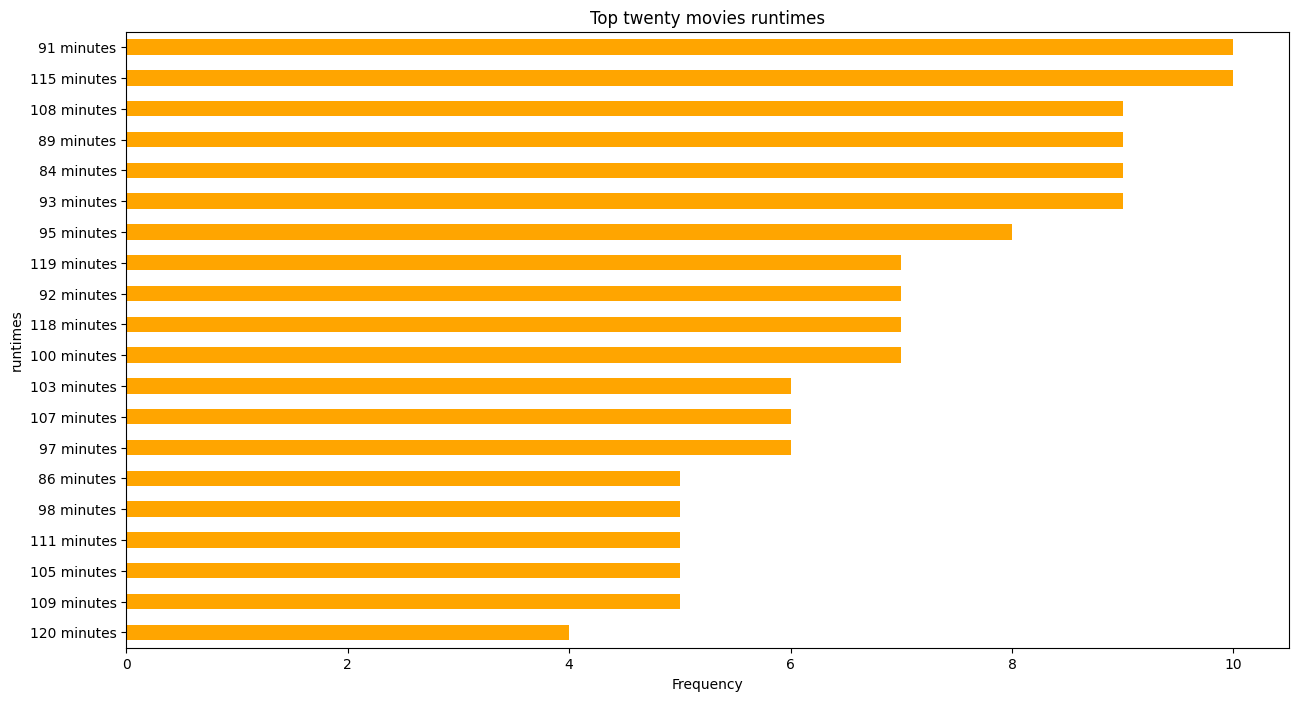

In [39]:
# Function for plotting several horizontal bar graphs.
def plot_horizontal_bar_graph(data,title,xlabel,ylabel,top =20,color='blue'):
    plt.figure(figsize=(15,8))
    data.value_counts().head(top).sort_values().plot(kind='barh', color= 'orange')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_horizontal_bar_graph(df2['runtime'],"Top twenty movies runtimes","Frequency","runtimes",top=20)

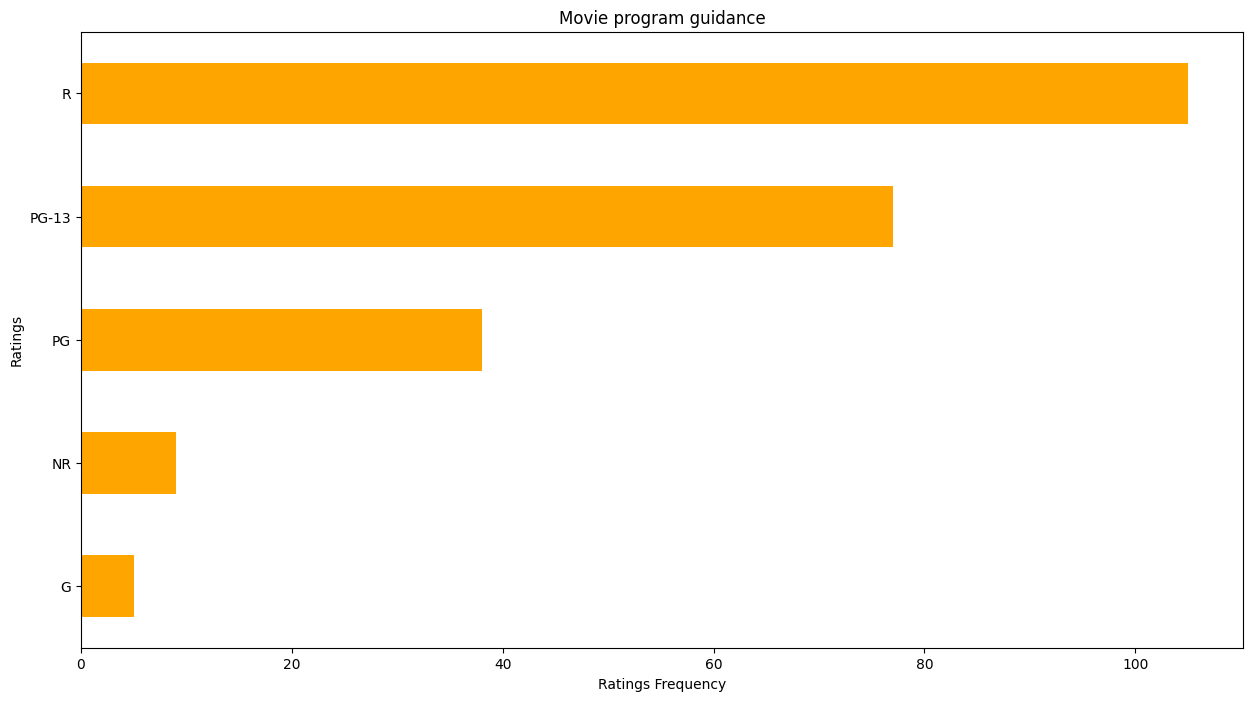

In [40]:
# Plot horizontal graph for movie ratings.
plot_horizontal_bar_graph(df2["rating"],"Movie program guidance","Ratings Frequency","Ratings",top=5)

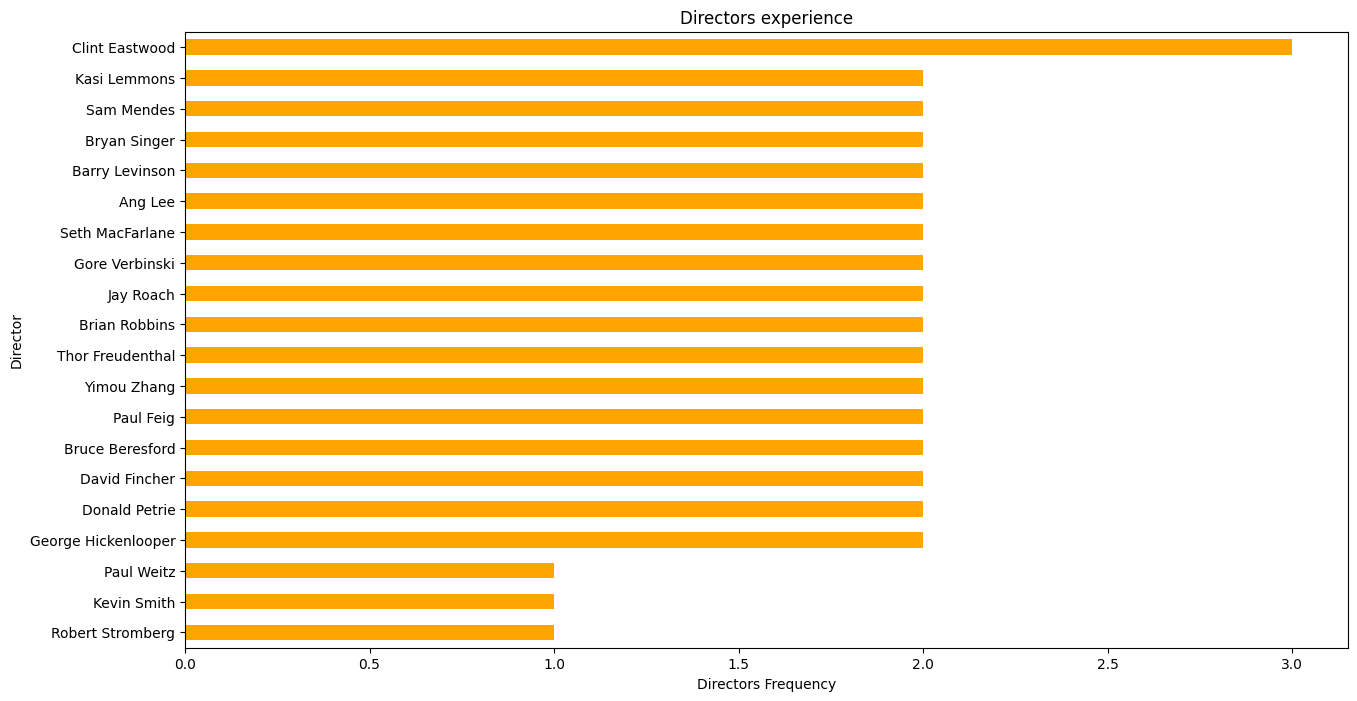

In [41]:

plot_horizontal_bar_graph(df2["director"],"Directors experience","Directors Frequency","Director",top=20)

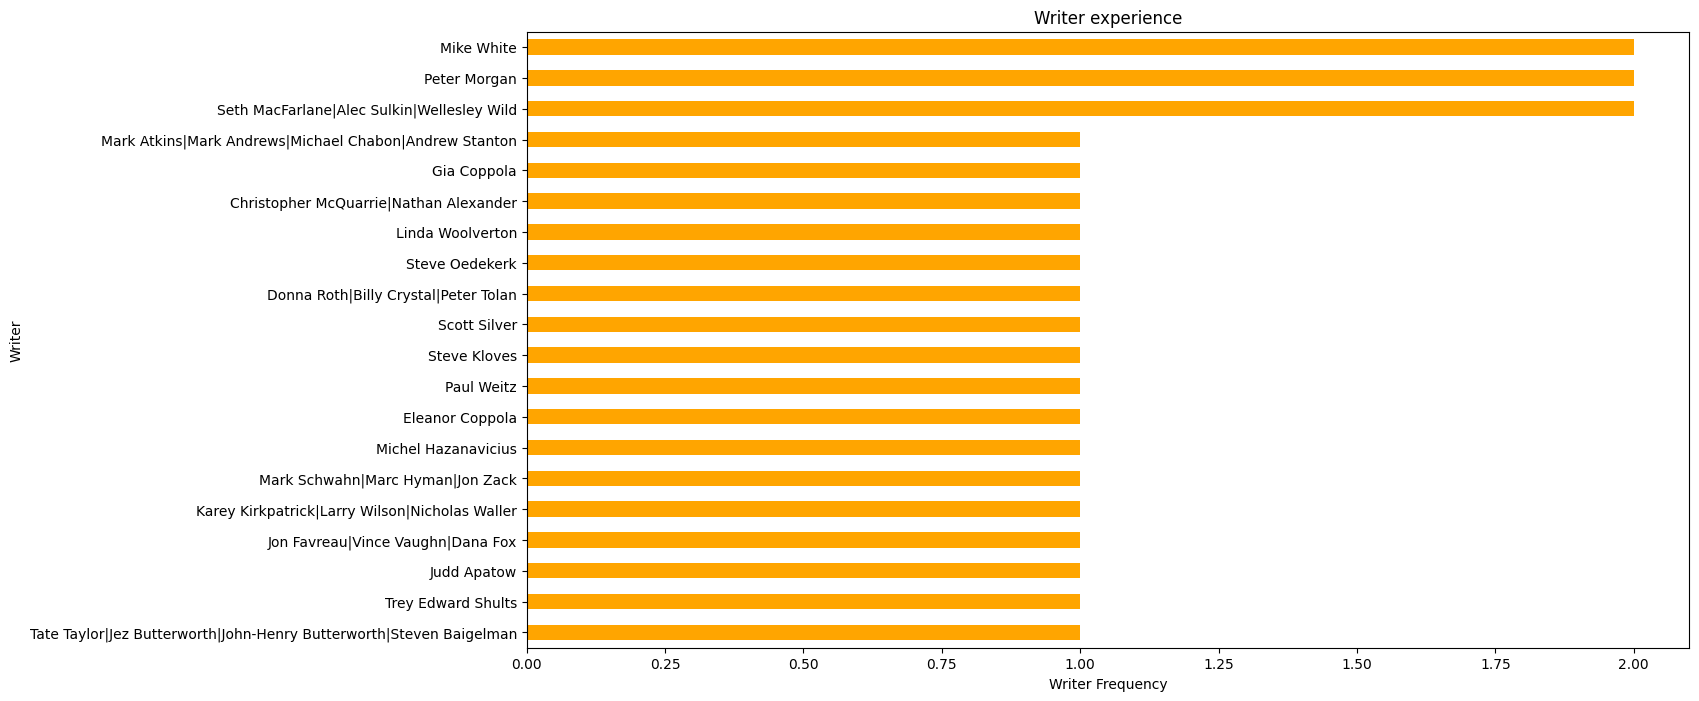

In [42]:
# Plot a horizontal bar graph for writers experience.
plot_horizontal_bar_graph(df2["writer"],"Writer experience","Writer Frequency","Writer",top=20)

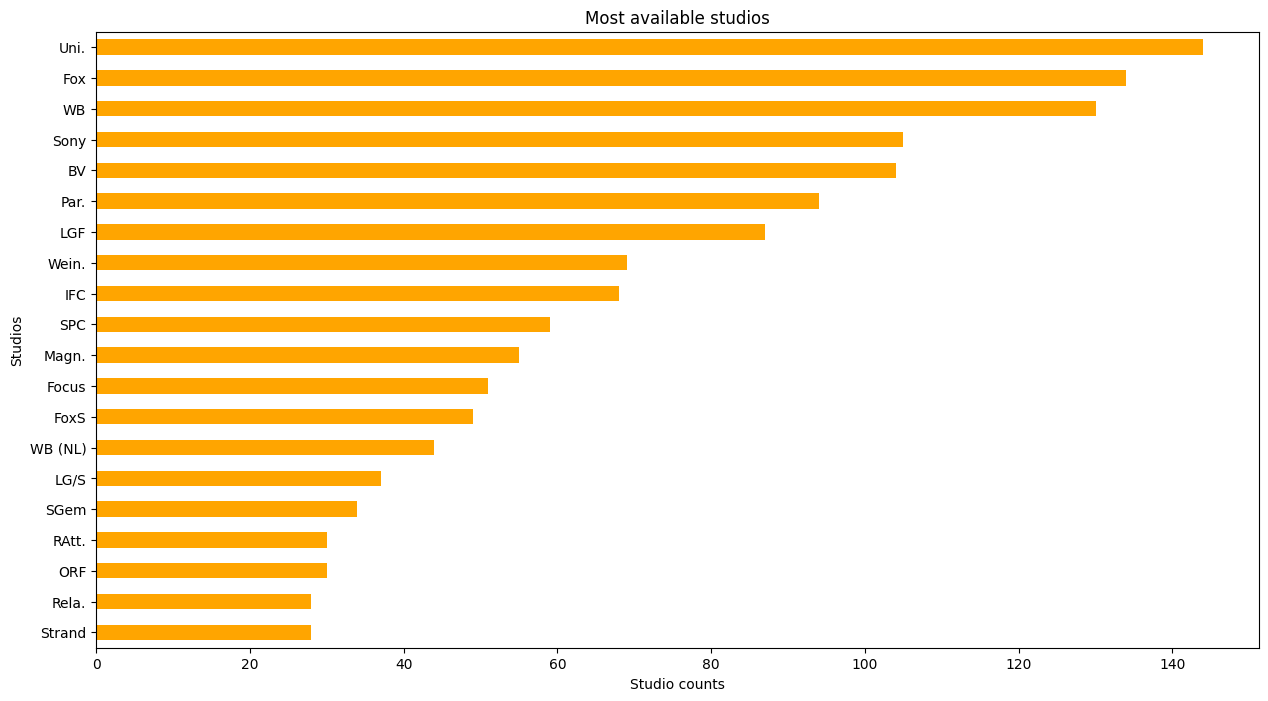

In [43]:
# Plot horizontal graph for studio counts.
plot_horizontal_bar_graph(df1['studio'],"Most available studios","Studio counts","Studios",top=20)

In [44]:
# Create a new column in df1 to show total profit of studios.
df1['total_profit'] = (df1['domestic_gross'] + df1['foreign_gross'])

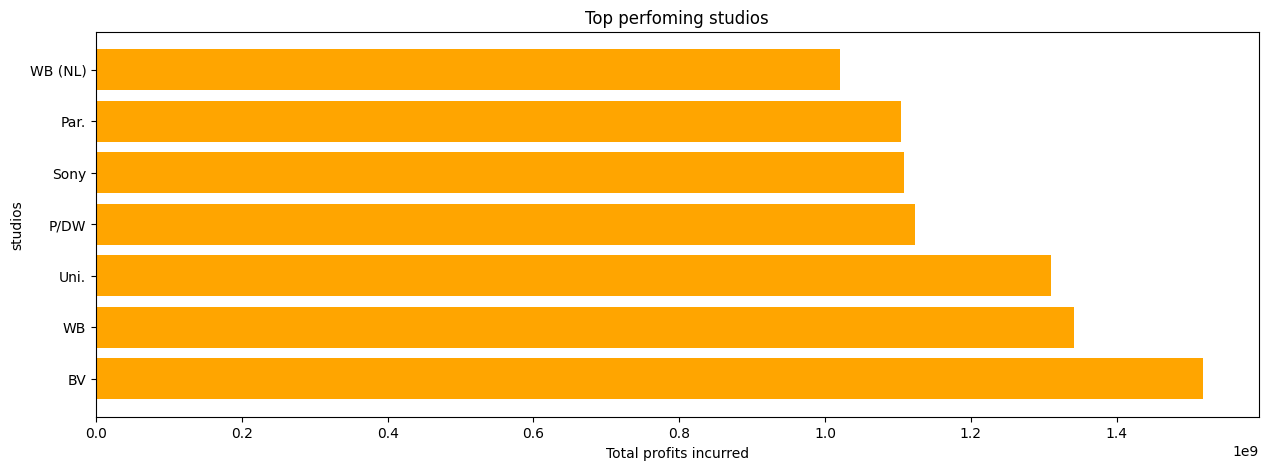

In [45]:
top = df1.sort_values(by='total_profit', ascending = False)
top_20 = top.head(30)
plt.figure(figsize=(15,5))

plt.barh(top_20['studio'], top_20['total_profit'], color ='orange')
plt.title('Top perfoming studios')
plt.ylabel('studios')
plt.xlabel('Total profits incurred')
plt.show()

In [ ]:
# Your code here - remember to use markdown cells for comments as well!